In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/covid_data_2020-2021.csv.zip")

In [ ]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other


In [ ]:

data.shape

(5861480, 10)

In [ ]:
data = data.drop('test_date' , axis = 1)

In [ ]:
data.shape

(5861480, 9)

**Checking duplicates**

In [ ]:
data.duplicated().any()

True

In [ ]:
data.drop_duplicates()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,Negative,Yes,female,Other
1,0,0,0,0,0,Negative,Yes,male,Other
2,0,0,0,0,0,Negative,No,female,Other
12,0,0,0,0,0,Negative,No,male,Other
218,0,0,0,0,0,Positive,No,male,Other
...,...,...,...,...,...,...,...,...,...
5856327,0,0,1,1,1,Positive,No,female,Abroad
5856442,0,1,1,1,1,Positive,No,female,Abroad
5856817,1,1,1,1,0,Positive,Yes,female,Abroad
5856866,1,0,1,1,1,Positive,No,male,Abroad


**Checking null values**

In [ ]:
data.isnull().any().sum()

0

**Checking the number of unique values**

In [ ]:
data['age_60_and_above'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:

data['corona_result'].unique()

array(['Negative', 'Positive'], dtype=object)

In [ ]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

Since the values are in Strings thats why we have to convert these values to integer format to apply models on it...

**Applying Label Encoder on the particular columns to convert them to integer...**

In [ ]:
from sklearn.preprocessing import LabelEncoder
k=LabelEncoder()

In [ ]:
data['gender'] = k.fit_transform(data['gender'])

In [ ]:
data['corona_result'] = k.fit_transform(data['corona_result'])

In [ ]:
data['test_indication'] = k.fit_transform(data['test_indication'])

In [ ]:
data['age_60_and_above'] = k.fit_transform(data['age_60_and_above'])

Now checking the values that are stored in place of the strings.....


In [ ]:
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,1,0,2
1,0,0,0,0,0,0,1,1,2
2,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,2
4,0,0,0,0,0,0,1,0,2


We can clearly see that all the strings are now changed to the 0 and 1 form......

**Our target is Corona Result...Hence we are going to divide the data in x and y**

In [ ]:
x = data.drop('corona_result' , axis=1)

In [ ]:
y = data['corona_result']

In [ ]:
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)


In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(x_train , y_train)

LogisticRegression(solver='liblinear')

In [ ]:
model.score(x_train , y_train)

0.9084888038932832

In [ ]:
model.score(x_test , y_test)

0.9083276052588075

The trainig score and testing score in LogisticRegreesion Model is 90.84% ...So to increase this score we will now chcek this with another model...


**We are now going to use Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rfc.score(x_train , y_train)

0.9153727314068061

In [ ]:
rfc.score(x_test , y_test)

0.9149515284618341

**Since the Random Forest Classifier increases the score but still the score is not as good as we want...**

**Now we are going to use the Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train , y_train)

GaussianNB()

In [ ]:
gnb.score(x_train , y_train)

0.8960378518768171

In [ ]:
gnb.score(x_test , y_test)

0.8957456315221358

Oh my God the score is decreasing now...

**Since the highest score is still 91.53% therefore we will now try XGBoost Classifier**

In [ ]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')

In [ ]:
xgboost.fit(x_train , y_train)

XGBClassifier(eval_metric='mlogloss', use_label_encoder=True)

In [ ]:
xgboost.score(x_train , y_train)

0.9143626621913461

In [ ]:
xgboost.score(x_test , y_test)

0.9139688416630541

**Since after using XGBoost we are getting only 91.39% of accuracy thats why we can say that this is the highest accuracy of the data given....**

**We cannot achieve more accuracy on that...**

Now I am going to make some charts for visualization purposes...

In [ ]:
print("Prediction on Train Data_Set")
yp_train = model.predict(x_train)
data = pd.DataFrame({'Actual':y_train,'Predicted':yp_train}) 
data.head(10)

Prediction on Train Data_Set


,Actual,Predicted
4152091,0,0
1697871,0,0
1114541,0,0
934297,0,0
766792,0,0
23596,0,0
4450906,0,0
2975740,0,0
5317702,0,0
2121346,0,0


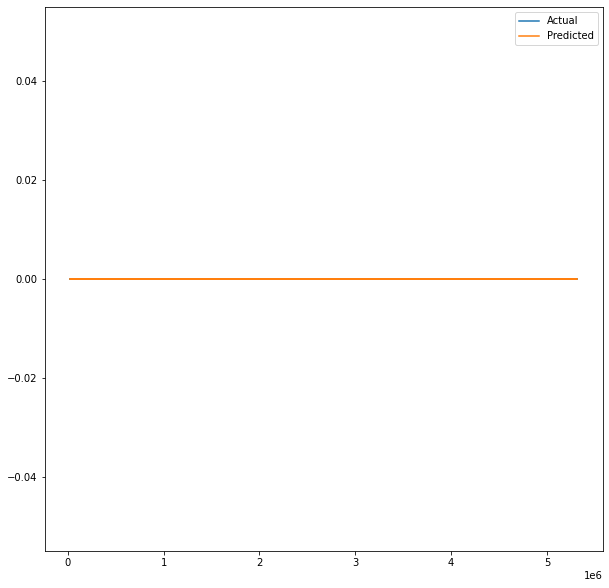

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
data["Actual"][:25,].plot.line()
data["Predicted"][:25,].plot.line()
plt.legend()
plt.show()

Error Exists in training data


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

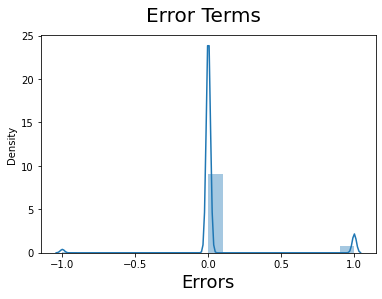

In [ ]:
import seaborn as sns

print('Error Exists in training data')
fig = plt.figure()
sns.distplot((y_train - yp_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:
df = pd.DataFrame(data, columns = ['cough', 'fever', 
                                    'sore_throat', 'shortness_of_breath',
                                    'head_ache', 'corona_result' , 'age_60_and_above' , 'gender' , 'test_indication'] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3172c93710>,
      dtype=object)

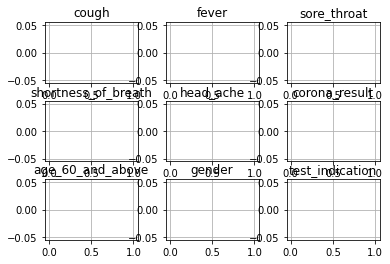

In [ ]:
df.hist()

In [ ]:
plt.show()

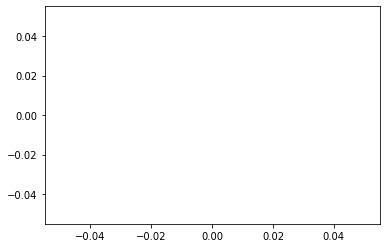

In [ ]:
plt.scatter(df['corona_result'], df['gender'])
plt.show()

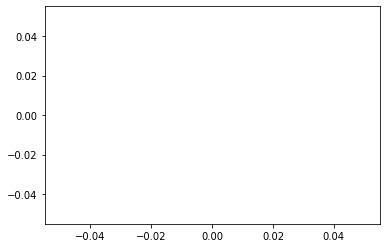

In [ ]:
plt.scatter(df['corona_result'], df['age_60_and_above'])
plt.show()

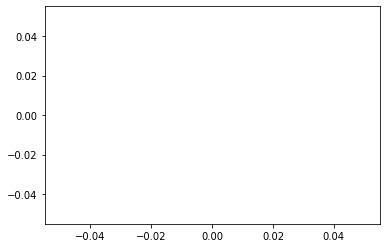

In [ ]:
plt.scatter(df['cough'], df['test_indication'])
plt.show()

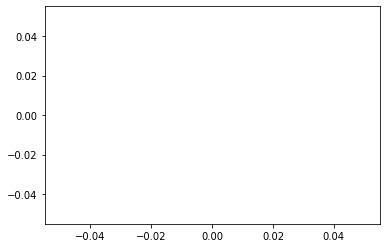

In [ ]:
plt.scatter(df['cough'], df['fever'])
plt.show()

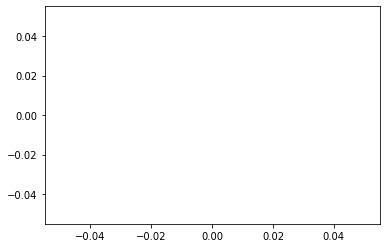

In [ ]:
plt.scatter(df['shortness_of_breath'], df['gender'])
plt.show()